This code uses python and jupyter notebooks to analyze data provided through PCW's linode.
This code will look for locally downloaded .json files and add all entries into a data frame.
Thank you chatgpt for making it really easy to refresh my knowledge.

In [55]:
#import necessary libraries

import pandas as pd        
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
#ensure that all json files are put into appropriate folder.
#loop through all files and append them to a main data frame.

folder_path = 'data/PCW'   #path name to general info
dfs = []                   #list of all data frames/data

for filename in os.listdir(folder_path):                    #for each file in data/PCW
    if filename.endswith('.json'):                          #if file is a .json
        filepath = os.path.join(folder_path, filename)      #create new file path. concatenate original filepath + target file    
        df = pd.read_json(filepath)                         #create a data frame using new file path
        dfs.append(df)                                      #append mini data frame to main data frame

df = pd.concat(dfs, ignore_index=True)                      #concatenate all dfs into one df


In [59]:
#lets take a look, check to make sure 
print(df)

#each file had ~500 entries, looks good

                           _id                mac                   site_id  \
0     61a92e43f7f8e45208fd7a9c  7e:52:8d:17:13:68  602ec7eef7f8e434c242d403   
1     6223be0df7f8e41f40ffea85  d8:c4:6a:bd:98:33  602ec7eef7f8e434c242d403   
2     63c73d40f7f8e4020886c7cf  02:8c:88:ee:5a:71  602ec7eef7f8e434c242d403   
3     63c7537cf7f8e4020886d14f  1c:d6:be:bd:6c:7e  602ec7eef7f8e434c242d403   
4     63c759cff7f8e4020886d475  42:4f:c4:62:45:e4  602ec7eef7f8e434c242d403   
...                        ...                ...                       ...   
1639  64024473f7f8e40205b52c6a  d0:5f:b8:bd:b0:70  602ec7eef7f8e434c242d403   
1640  6402467df7f8e40205b52e26  60:3c:ee:21:6d:98  602ec7eef7f8e434c242d403   
1641  64024e26f7f8e40205b53230  b6:e4:dc:43:20:ec  602ec7eef7f8e434c242d403   
1642  64025029f7f8e40205b53355  00:57:c1:c0:34:fb  602ec7eef7f8e434c242d403   
1643  640267acf7f8e40205b5400c  3c:5c:c4:e2:d3:cb  602ec7eef7f8e434c242d403   

                                         oui  is_gu

In [61]:
#create a heatmap to visualize NaN values
#double check for invalid values and remove any if necessary.

plt.figure(figsize=(100, 100))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', linewidths=0.5, linecolor='gray')
plt.title('Heatmap of Null/Invalid Values in the DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

#most non valid col's are hostname, name, noted. this is expected.
#some invalid entries in disconnect time stamp.
#decision: use disconnect time stamp

In [62]:
#time stamps are in unix time
#add new col called first_seen_date_time
df['first_seen_datetime'] = pd.to_datetime(df['first_seen'], unit='s')
df['last_seen_datetime'] = pd.to_datetime(df['last_seen'], unit='s')

In [63]:
df.head()

,_id,mac,site_id,oui,is_guest,first_seen,last_seen,is_wired,usergroup_id,hostname,disconnect_timestamp,name,noted,wlanconf_id,first_seen_datetime,last_seen_datetime
0,61a92e43f7f8e45208fd7a9c,7e:52:8d:17:13:68,602ec7eef7f8e434c242d403,,True,1638477379,1661382448,False,,Pixel-4a,1.661382e+09,Alex,1.0,602ed913f7f8e4408d8559fe,2021-12-02 20:36:19,2022-08-24 23:07:28
1,6223be0df7f8e41f40ffea85,d8:c4:6a:bd:98:33,602ec7eef7f8e434c242d403,"Murata Manufacturing Co., Ltd.",True,1646509581,1646526661,False,,Galaxy-S7-edge,1.646527e+09,Allan,1.0,NaN,2022-03-05 19:46:21,2022-03-06 00:31:01
2,63c73d40f7f8e4020886c7cf,02:8c:88:ee:5a:71,602ec7eef7f8e434c242d403,,True,1674001728,1677703333,False,,NaN,1.677703e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 00:28:48,2023-03-01 20:42:13
3,63c7537cf7f8e4020886d14f,1c:d6:be:bd:6c:7e,602ec7eef7f8e434c242d403,Wistron Neweb Corporation,True,1674007420,1677673729,False,,NaN,1.677674e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:03:40,2023-03-01 12:28:49
4,63c759cff7f8e4020886d475,42:4f:c4:62:45:e4,602ec7eef7f8e434c242d403,,True,1674009039,1677536084,False,,NaN,1.677536e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:30:39,2023-02-27 22:14:44


In [64]:
#extract date part (yyyy/mm/dd), add new col
df['first_seen_date'] = df['first_seen_datetime'].dt.strftime('%Y/%m/%d')
df['last_seen_date'] = df['last_seen_datetime'].dt.strftime('%Y/%m/%d')

In [65]:
df.head()

,_id,mac,site_id,oui,is_guest,first_seen,last_seen,is_wired,usergroup_id,hostname,disconnect_timestamp,name,noted,wlanconf_id,first_seen_datetime,last_seen_datetime,first_seen_date,last_seen_date
0,61a92e43f7f8e45208fd7a9c,7e:52:8d:17:13:68,602ec7eef7f8e434c242d403,,True,1638477379,1661382448,False,,Pixel-4a,1.661382e+09,Alex,1.0,602ed913f7f8e4408d8559fe,2021-12-02 20:36:19,2022-08-24 23:07:28,2021/12/02,2022/08/24
1,6223be0df7f8e41f40ffea85,d8:c4:6a:bd:98:33,602ec7eef7f8e434c242d403,"Murata Manufacturing Co., Ltd.",True,1646509581,1646526661,False,,Galaxy-S7-edge,1.646527e+09,Allan,1.0,NaN,2022-03-05 19:46:21,2022-03-06 00:31:01,2022/03/05,2022/03/06
2,63c73d40f7f8e4020886c7cf,02:8c:88:ee:5a:71,602ec7eef7f8e434c242d403,,True,1674001728,1677703333,False,,NaN,1.677703e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 00:28:48,2023-03-01 20:42:13,2023/01/18,2023/03/01
3,63c7537cf7f8e4020886d14f,1c:d6:be:bd:6c:7e,602ec7eef7f8e434c242d403,Wistron Neweb Corporation,True,1674007420,1677673729,False,,NaN,1.677674e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:03:40,2023-03-01 12:28:49,2023/01/18,2023/03/01
4,63c759cff7f8e4020886d475,42:4f:c4:62:45:e4,602ec7eef7f8e434c242d403,,True,1674009039,1677536084,False,,NaN,1.677536e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:30:39,2023-02-27 22:14:44,2023/01/18,2023/02/27


In [66]:
#okay so cant use first seen and last seen. just realized it isnt first seen for the day, but first seen ever
#instead we will use disconnect time_stamp
df['disconnect_timestamp_datetime'] = pd.to_datetime(df['disconnect_timestamp'], unit='s')

In [73]:
df.head()

,_id,mac,site_id,oui,is_guest,first_seen,last_seen,is_wired,usergroup_id,hostname,disconnect_timestamp,name,noted,wlanconf_id,first_seen_datetime,last_seen_datetime,first_seen_date,last_seen_date,disconnect_timestamp_datetime
0,61a92e43f7f8e45208fd7a9c,7e:52:8d:17:13:68,602ec7eef7f8e434c242d403,,True,1638477379,1661382448,False,,Pixel-4a,1.661382e+09,Alex,1.0,602ed913f7f8e4408d8559fe,2021-12-02 20:36:19,2022-08-24 23:07:28,2021/12/02,2022/08/24,2022-08-24 23:07:49
1,6223be0df7f8e41f40ffea85,d8:c4:6a:bd:98:33,602ec7eef7f8e434c242d403,"Murata Manufacturing Co., Ltd.",True,1646509581,1646526661,False,,Galaxy-S7-edge,1.646527e+09,Allan,1.0,NaN,2022-03-05 19:46:21,2022-03-06 00:31:01,2022/03/05,2022/03/06,2022-03-06 00:32:00
2,63c73d40f7f8e4020886c7cf,02:8c:88:ee:5a:71,602ec7eef7f8e434c242d403,,True,1674001728,1677703333,False,,NaN,1.677703e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 00:28:48,2023-03-01 20:42:13,2023/01/18,2023/03/01,2023-03-01 20:42:58
3,63c7537cf7f8e4020886d14f,1c:d6:be:bd:6c:7e,602ec7eef7f8e434c242d403,Wistron Neweb Corporation,True,1674007420,1677673729,False,,NaN,1.677674e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:03:40,2023-03-01 12:28:49,2023/01/18,2023/03/01,2023-03-01 12:29:51
4,63c759cff7f8e4020886d475,42:4f:c4:62:45:e4,602ec7eef7f8e434c242d403,,True,1674009039,1677536084,False,,NaN,1.677536e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:30:39,2023-02-27 22:14:44,2023/01/18,2023/02/27,2023-02-27 22:15:40


In [75]:
#extract date part (yyyy/mm/dd), add new col
df['disconnect_timestamp_date'] = df['disconnect_timestamp_datetime'].dt.strftime('%Y/%m/%d')
df.head()

,_id,mac,site_id,oui,is_guest,first_seen,last_seen,is_wired,usergroup_id,hostname,disconnect_timestamp,name,noted,wlanconf_id,first_seen_datetime,last_seen_datetime,first_seen_date,last_seen_date,disconnect_timestamp_datetime,disconnect_timestamp_date
0,61a92e43f7f8e45208fd7a9c,7e:52:8d:17:13:68,602ec7eef7f8e434c242d403,,True,1638477379,1661382448,False,,Pixel-4a,1.661382e+09,Alex,1.0,602ed913f7f8e4408d8559fe,2021-12-02 20:36:19,2022-08-24 23:07:28,2021/12/02,2022/08/24,2022-08-24 23:07:49,2022/08/24
1,6223be0df7f8e41f40ffea85,d8:c4:6a:bd:98:33,602ec7eef7f8e434c242d403,"Murata Manufacturing Co., Ltd.",True,1646509581,1646526661,False,,Galaxy-S7-edge,1.646527e+09,Allan,1.0,NaN,2022-03-05 19:46:21,2022-03-06 00:31:01,2022/03/05,2022/03/06,2022-03-06 00:32:00,2022/03/06
2,63c73d40f7f8e4020886c7cf,02:8c:88:ee:5a:71,602ec7eef7f8e434c242d403,,True,1674001728,1677703333,False,,NaN,1.677703e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 00:28:48,2023-03-01 20:42:13,2023/01/18,2023/03/01,2023-03-01 20:42:58,2023/03/01
3,63c7537cf7f8e4020886d14f,1c:d6:be:bd:6c:7e,602ec7eef7f8e434c242d403,Wistron Neweb Corporation,True,1674007420,1677673729,False,,NaN,1.677674e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:03:40,2023-03-01 12:28:49,2023/01/18,2023/03/01,2023-03-01 12:29:51,2023/03/01
4,63c759cff7f8e4020886d475,42:4f:c4:62:45:e4,602ec7eef7f8e434c242d403,,True,1674009039,1677536084,False,,NaN,1.677536e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:30:39,2023-02-27 22:14:44,2023/01/18,2023/02/27,2023-02-27 22:15:40,2023/02/27


In [77]:
#for some reason, the dates are widely ranging even though the data originally downloaded should have been 2023 March 1 - 3.
#try this

#group by the date and count unique users
daily_unique_users = df.groupby('disconnect_timestamp_date')['mac'].nunique().reset_index()

# Rename columns for clarity
daily_unique_users.columns = ['Date', 'Unique MAC IDs']

print(daily_unique_users)


          Date  Unique MAC IDs
0   2022/03/06               1
1   2022/08/24               1
2   2023/02/22              18
3   2023/02/23              49
4   2023/02/24              49
5   2023/02/25              38
6   2023/02/26              42
7   2023/02/27              75
8   2023/02/28             110
9   2023/03/01             190
10  2023/03/02             168
11  2023/03/03             165


In [89]:
#currently 'date' is a string.
#turn it into a datetime object for easier sorting.
daily_unique_users['Date'] = pd.to_datetime(daily_unique_users['Date'])
print(daily_unique_users)

         Date  Unique MAC IDs
0  2022-03-06               1
1  2022-08-24               1
2  2023-02-22              18
3  2023-02-23              49
4  2023-02-24              49
5  2023-02-25              38
6  2023-02-26              42
7  2023-02-27              75
8  2023-02-28             110
9  2023-03-01             190
10 2023-03-02             168
11 2023-03-03             165


In [91]:
#scrub data. eliminate dates which we are not interested in.
#in this example we work with March 1-3.

#date range yyyy-mm-dd
start_date = '2023-03-01'
end_date = '2023-03-03'

#filter
filtered_df = daily_unique_users[(daily_unique_users['Date'] >= start_date) & (daily_unique_users['Date'] <= end_date)]

#display
print(filtered_df)

         Date  Unique MAC IDs
9  2023-03-01             190
10 2023-03-02             168
11 2023-03-03             165


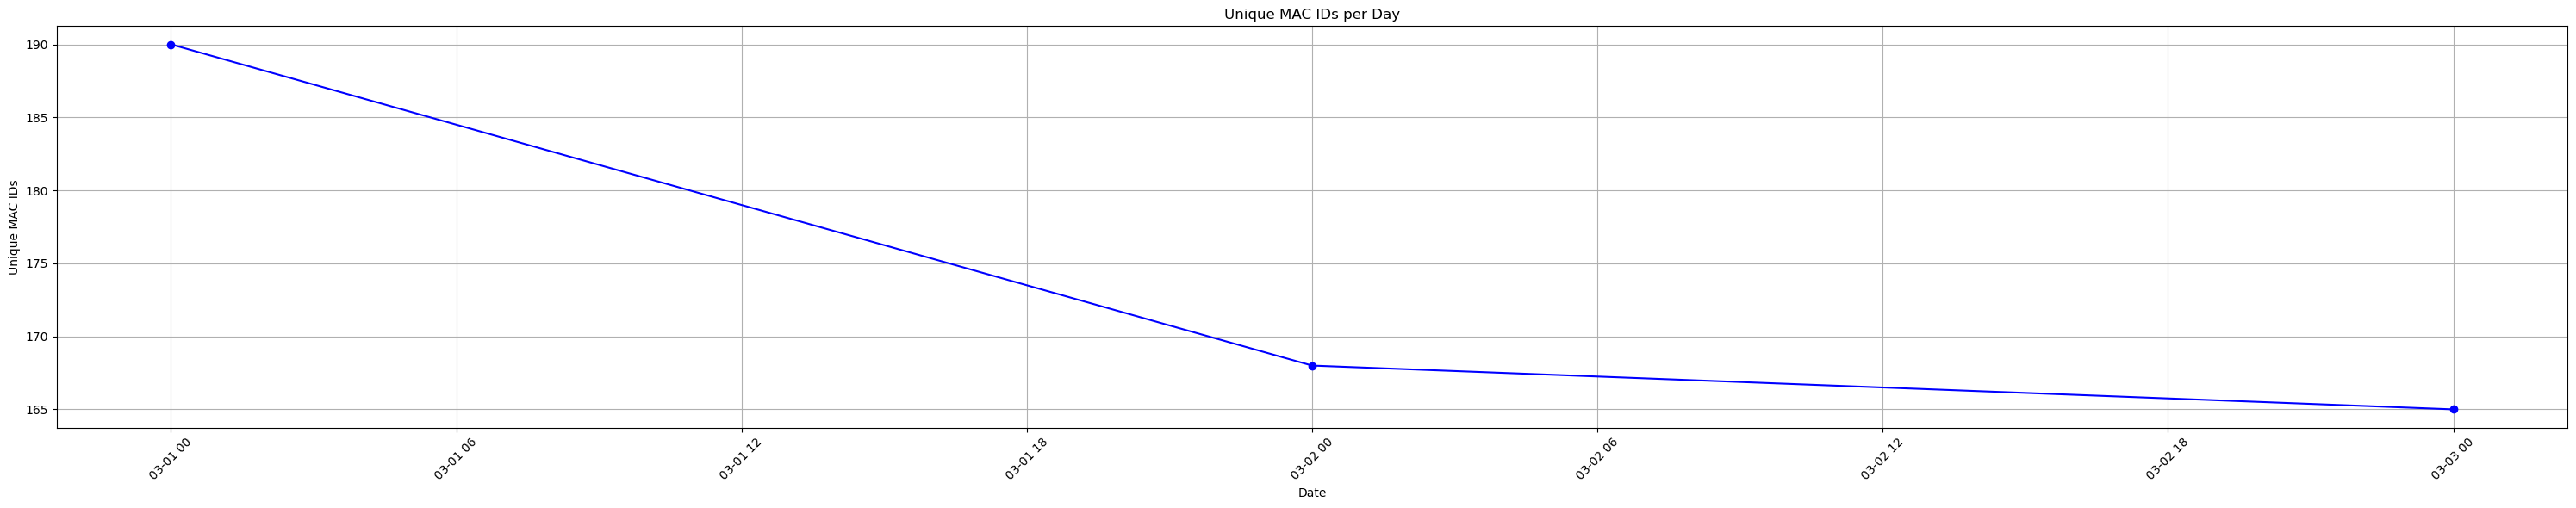

In [93]:
plt.figure(figsize=(30, 6))
plt.plot(filtered_df['Date'], filtered_df['Unique MAC IDs'], marker='o', linestyle='-', color='b')
plt.title('Unique MAC IDs per Day')
plt.xlabel('Date')
plt.ylabel('Unique MAC IDs')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
#downward trend may be explained by us not having the full month. Due to the fact that some data entries seem to be saved in the future files,
#we may be missing all information